# Iris Dataset: A Friendly Walkthrough

This notebook walks you through the **data science process** using the famous Iris flower dataset. It is designed for business audiences with limited technical background and explains each step in plain language.

## 1. Getting to Know the Data
We start by loading the dataset and taking a quick peek at its contents.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set(style='whitegrid', context='talk')
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Is the Data Clean?
We check for missing information.

In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 3. What Do the Numbers Look Like?
Basic statistics give a sense of typical flower sizes.

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Visual Explorations
Charts help us see patterns that numbers alone may hide.

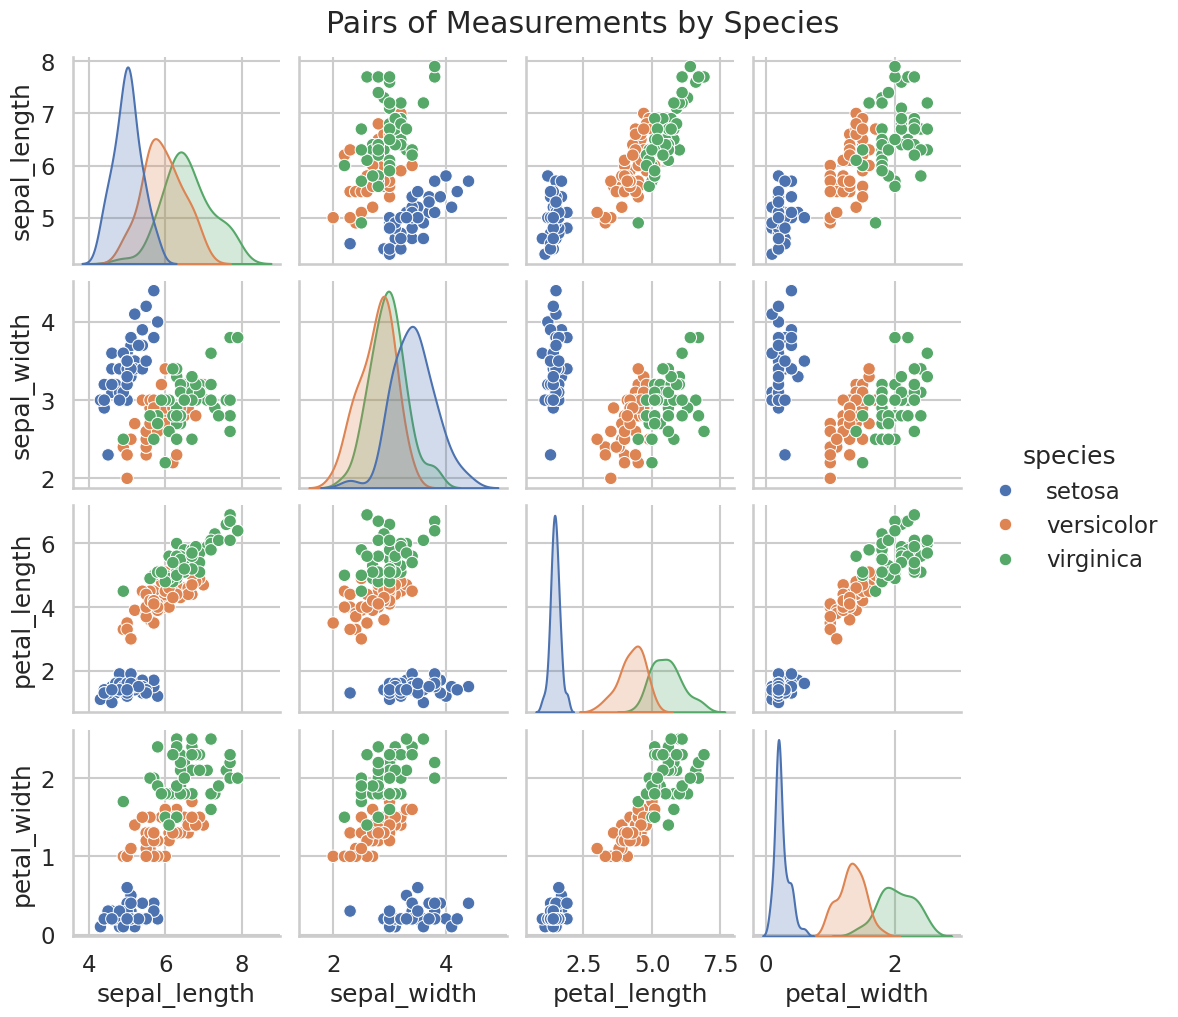

In [4]:
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairs of Measurements by Species', y=1.02)
plt.show()

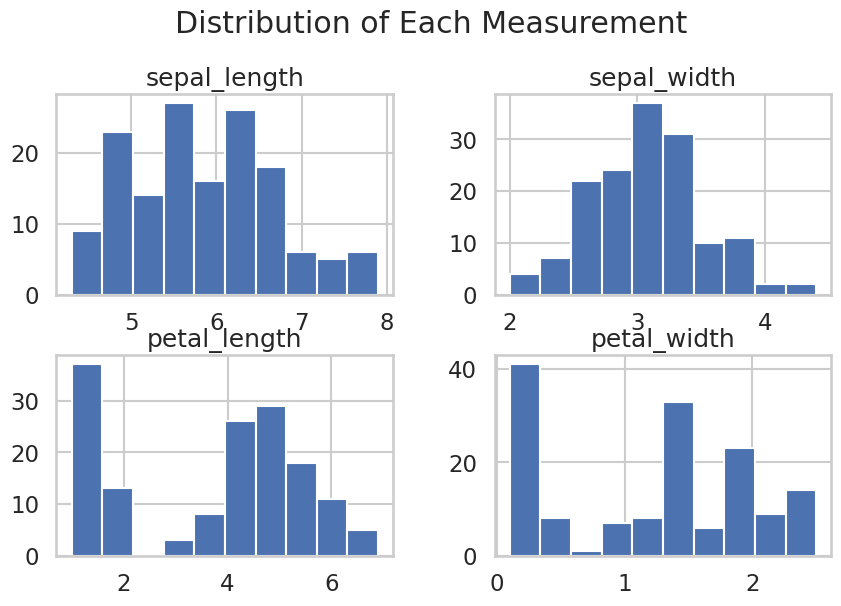

In [5]:
df.hist(figsize=(10,6))
plt.suptitle('Distribution of Each Measurement', y=1.02)
plt.show()

## 5. Creating New Insights
We create new features that may help our model.

In [6]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


## 6. How Do Features Relate?
A heatmap shows relationships between measurements.

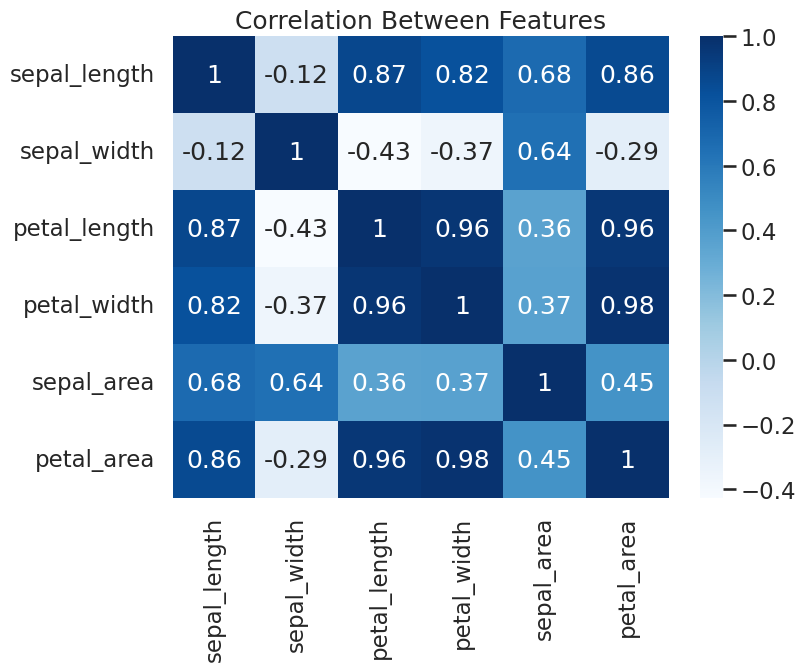

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

## 7. Building Simple Prediction Models
We train a few algorithms to predict the flower species.

In [8]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
results

{'Logistic Regression': 1.0,
 'Decision Tree': 0.9,
 'Random Forest': 0.9333333333333333}

## 8. Where Do Models Get Confused?
A confusion matrix shows correct and incorrect predictions.

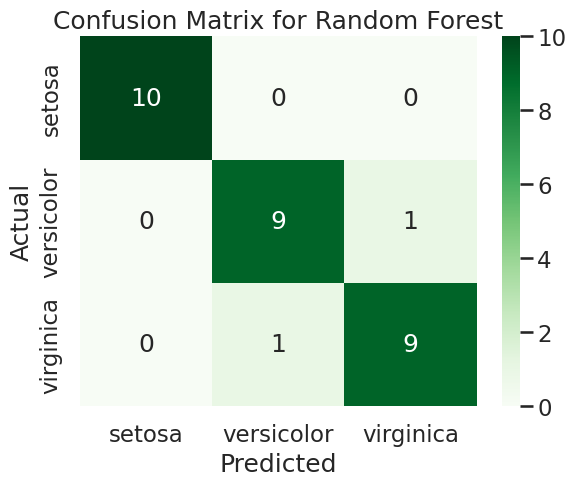

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [9]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()
print(classification_report(y_test, preds))

## 9. Key Takeaways
The Iris dataset is well-behaved and easy to work with. Simple models can accurately predict species based on measurements. Business users can feel confident using such models to categorize new observations.